In [1]:
!ls /kaggle/input/rp2k-dataset

meta.csv  rp2k_dataset


In [2]:
!ls /kaggle/input/rp2k-dataset/rp2k_dataset/all

test  train


In [3]:
import cv2
from fastai.vision.all import get_image_files,Path

base_dir = Path("/kaggle/input/rp2k-dataset/rp2k_dataset/all/")

train_list = get_image_files(base_dir / Path("train"))
test_list = get_image_files(base_dir / Path("test"))

## remove uncommon classes

In [4]:
def get_label(path): return path.parent.name

train_classes = list(map(lambda x: get_label(x),train_list))
test_classes = list(map(lambda x: get_label(x),test_list))

uncommon_classes = list(set(train_classes).symmetric_difference(set(test_classes)))

def filter_uncommon(path_list,class_list):
    idxs = []
    for i in range(len(path_list)):
        if class_list[i] in uncommon_classes:
            
            # insertion sort in decending order
            idxs.append(i)
            last_idx = len(idxs)-1
            while(last_idx-1>=0 and idxs[last_idx]>idxs[last_idx-1]):
                # shift swap
                idxs[last_idx],idxs[last_idx-1] = idxs[last_idx-1],idxs[last_idx]
                last_idx-=1
                
#     print(idxs)
    for i in idxs:
        path_list.pop(i)
    
print("Uncommon Classes:\t",uncommon_classes)
print("Before:\t",len(train_list),len(test_list))
filter_uncommon(train_list,train_classes)
filter_uncommon(test_list,test_classes)
print("After:\t",len(train_list),len(test_list))

Uncommon Classes:	 ['黄山（大黄山）', '泰山（望岳）', '建牌（HD8）', '黄山松（醉翁亭）']
Before:	 344854 39457
After:	 344854 39453


In [5]:
train_classes = list(map(lambda x: get_label(x),train_list))
test_classes = list(map(lambda x: get_label(x),test_list))

uncommon_classes = list(set(train_classes).symmetric_difference(set(test_classes)))
uncommon_classes

[]

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 30021 (\N{CJK UNIFIED IDEOGRAPH-7545}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20248 (\N{CJK UNIFIED IDEOGRAPH-4F18}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 37240 (\N{CJK UNIFIED IDEOGRAPH-9178}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 22902 (\N{CJK UNIFIED IDEOGRAPH-5976}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 29275 (\N{CJK UNIFIED IDEOGRAPH-725B}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 26639 (\N{CJK UNIFIED IDEOGRAPH-68

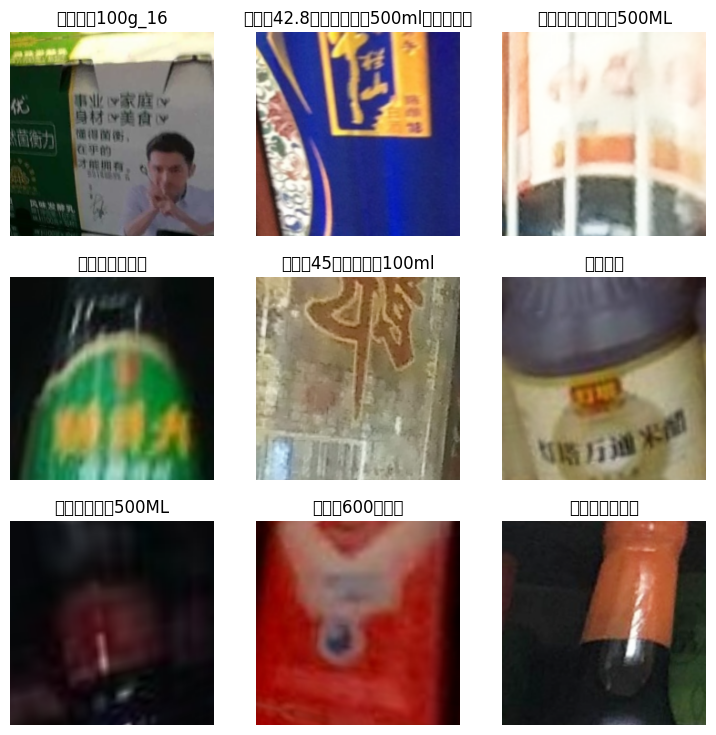

In [6]:
from fastai.vision.all import *
np.random.seed(24)

db = DataBlock( 
              blocks = [ImageBlock, CategoryBlock],
              item_tfms = Resize(224),
              batch_tfms = [Normalize.from_stats(*imagenet_stats), *aug_transforms()],
              get_y = get_label,
              splitter = GrandparentSplitter(train_name="train", valid_name="test")
      )

dls = db.dataloaders(source=train_list+test_list,shuffle=True,bs=256)
dls.train.show_batch()

In [7]:
x,y = dls.train.one_batch()
x.shape,y.shape

(torch.Size([256, 3, 224, 224]), torch.Size([256]))

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24609 (\N{CJK UNIFIED IDEOGRAPH-6021}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 27849 (\N{CJK UNIFIED IDEOGRAPH-6CC9}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 33487 (\N{CJK UNIFIED IDEOGRAPH-82CF}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25171 (\N{CJK UNIFIED IDEOGRAPH-6253}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24609 (\N{CJK UNIFIED IDEOGRA

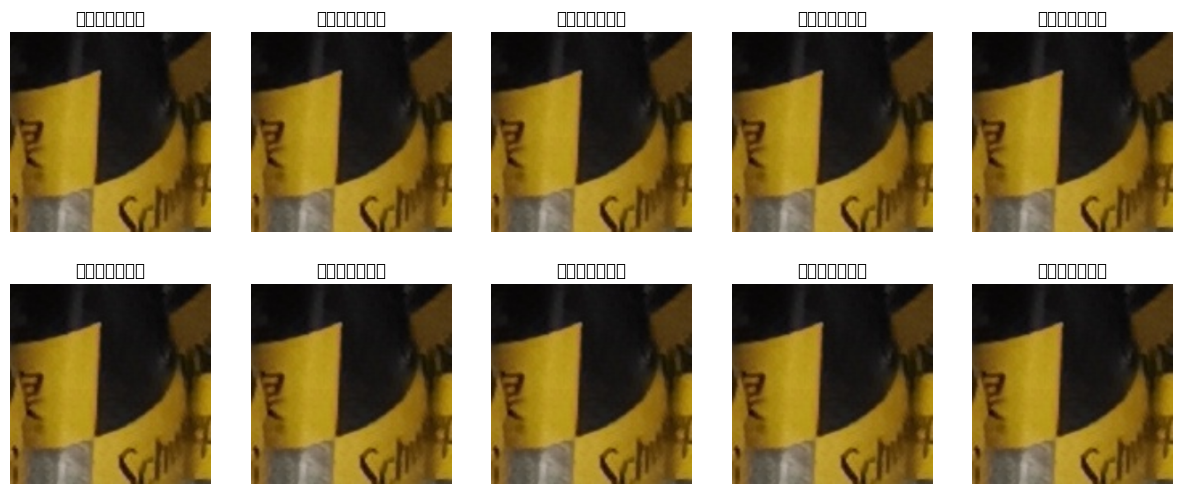

In [8]:
dls.valid.show_batch(max_n=10,nrows=2,unique=True)

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 29281 (\N{CJK UNIFIED IDEOGRAPH-7261}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20025 (\N{CJK UNIFIED IDEOGRAPH-4E39}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 30701 (\N{CJK UNIFIED IDEOGRAPH-77ED}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25903 (\N{CJK UNIFIED IDEOGRAPH-652F}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 40857 (\N{CJK UNIFIED IDEOGRAPH-9F

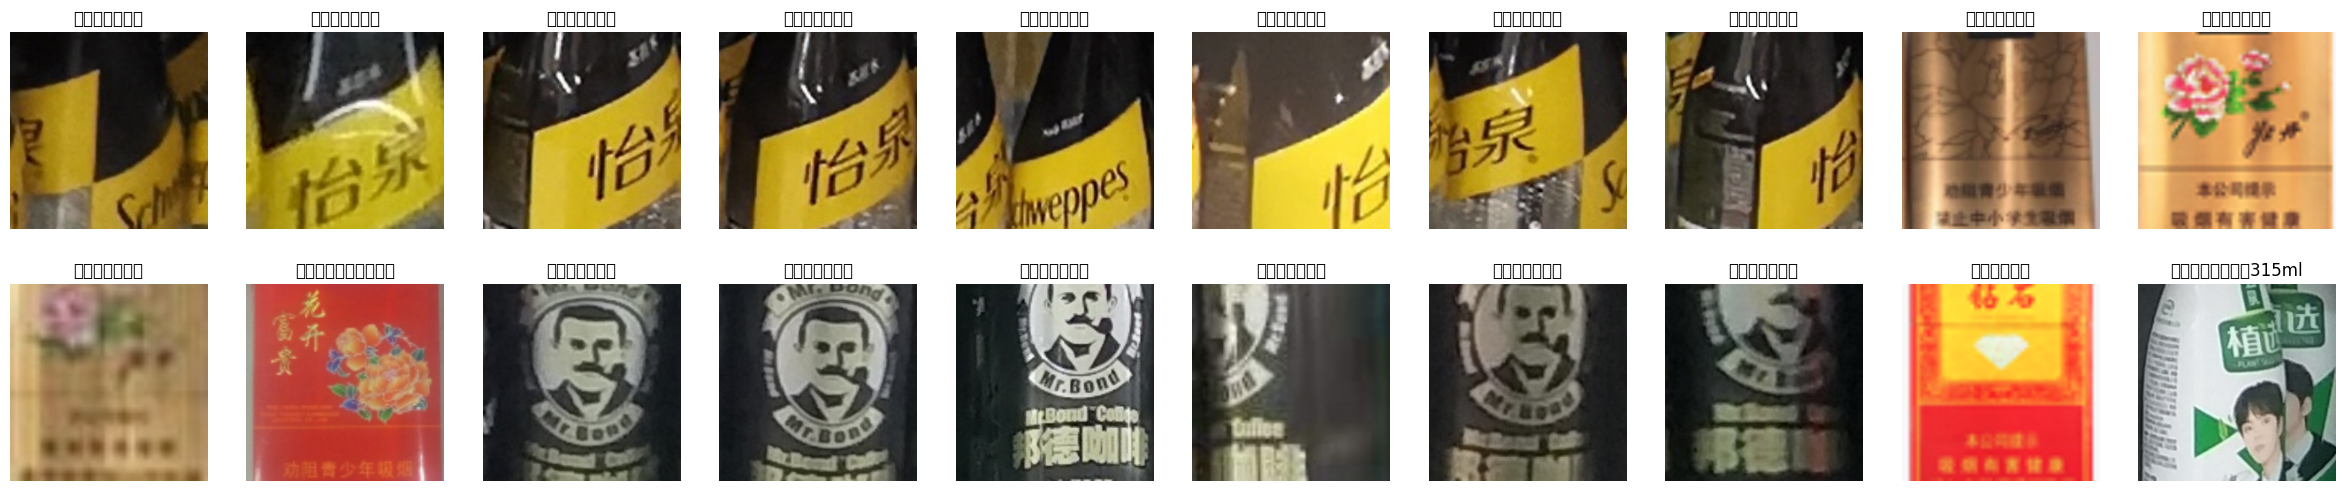

In [9]:
dls.valid.show_batch(max_n=20,nrows=2,unique=False)

In [10]:
learn = vision_learner(dls, models.resnet34, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 37.8MB/s]


In [11]:
# learn.load("stage_1")
# learn.lr_find()

In [12]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.490589,1.535414,0.304185,0.695815,14:56
1,1.382816,0.721033,0.168454,0.831546,12:29
2,1.117894,0.551391,0.136086,0.863914,12:23
3,0.975997,0.475394,0.118673,0.881327,12:21
4,0.928265,0.462627,0.115327,0.884673,12:06


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes sh

In [13]:
learn.save("stage_1")

Path('models/stage_1.pth')

In [14]:
learn.unfreeze()

In [15]:
learn.fit_one_cycle(n_epoch=5,lr_max=slice(1e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.851279,0.424521,0.108484,0.891517,15:35
1,0.705173,0.355531,0.092211,0.907789,15:37
2,0.608581,0.311323,0.081996,0.918004,15:37
3,0.534642,0.283524,0.074747,0.925253,15:35
4,0.514610,0.276327,0.072770,0.927230,15:37


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes sh

In [16]:
learn.save("stage_2")

Path('models/stage_2.pth')

In [17]:
interp=ClassificationInterpretation.from_learner(learn)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
interp.plot_confusion_matrix()

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
interp.print_classification_report()

In [ ]:
learn.export("model.pth")

In [ ]:
# !ls /kaggle/input/
# learn.save("try",with_opt=False)

In [ ]:
print(learn.model)

In [ ]:
# learn.save("model")

In [ ]:
# normalization_layer = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # normalization layer

# nn.Sequential(
#     normalization_layer,
#     model[0],    # Backbone
#     model[1][0:2],    # Flattening layer
# )

In [ ]:
# to load the model

# model = create_vision_model(models.resnet34, 2384, False)
# # model = models.resnet34()
# model_dict = torch.load("models/model.pth")
# model.load_state_dict(model_dict["model"])


In [ ]:
# import torch
# import torchvision
# import torchvision.transforms as transforms

# def save_onnx_model(model,filename):
#     # https://pytorch.org/vision/stable/models.html

#     pytorch_model = model.eval() # gets the PyTorch model
    
#     normalization_layer = torchvision.transforms.Normalize(*imagenet_stats) # normalization layer

#     # assembling the final model
#     final_model = nn.Sequential(
#         normalization_layer,
#         pytorch_model,
#     )
    

#     torch.onnx.export(
#         final_model, 
#         torch.randn(1, 3, 224, 224),
#         filename,
#         do_constant_folding=True,
#         export_params=True,
#         input_names=['input'],
#         output_names=['output'],
#         opset_version=13,
#         dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
#                      'output' : {0 : 'batch_size'}}
#     )

# save_onnx_model(learn.model,"model.onnx")